In [207]:
import ast
import json
import os

import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.offline as py
import plotly.plotly as py
import plotly.tools as tls
import string
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from src.data import read_files
from collections import Counter
import itertools

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [117]:
# Load the first `nrows` lines of train, test
train, test = read_files(nrows=100000)

In [118]:
name = []
for x in list(train)[12:]:
    x=str(x)
    name.append(x.replace('category.',''))


name = pd.DataFrame(data=name)
amount = pd.DataFrame(train.iloc[:,12:].apply(pd.to_numeric).sum())
cate_amount = pd.concat([name.reset_index(drop=True),amount.reset_index(drop=True)], axis=1)
cate_amount.columns = ['category', 'amount']
cate_amount = cate_amount.groupby(['category']).median().sort_values("amount",ascending=False)

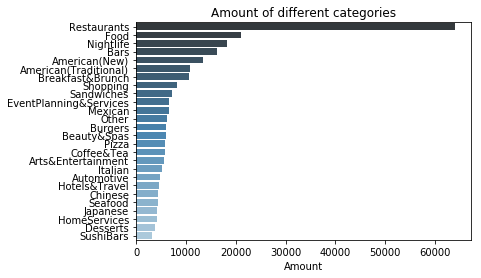

In [119]:
ax = sns.barplot(x="amount", y=cate_amount._stat_axis.values.tolist(), 
                 data=cate_amount, palette="Blues_d")
plt.xlabel('Amount')
plt.title('Amount of different categories')
plt.show()
#wanna change the width of the bar

In [177]:
train['food'] = 'Other'
train.loc[train.iloc[:,16]=='1', 'food'] = 'American(Traditional)'
train.loc[train.iloc[:,17]=='1', 'food'] = 'American(New)'
train.loc[train.iloc[:,24]=='1', 'food'] = 'Mexican'
train.loc[train.iloc[:,27]=='1', 'food'] = 'Italian'
train.loc[train.iloc[:,31]=='1', 'food'] = 'Japanese'
train.loc[train.iloc[:,35]=='1', 'food'] = 'Chinese'

In [155]:
name

,0
0,Restaurants
1,Food
2,Nightlife
3,Bars
4,American(Traditional)
5,American(New)
6,Breakfast&Brunch
7,EventPlanning&Services
8,Shopping
9,Sandwiches


In [174]:
train['category'] = 'Other'
train.loc[train.iloc[:,12]=='1', 'category'] = 'Restaurants'
train.loc[train.iloc[:,19]=='1', 'category'] = 'EventPlanning&Services'
train.loc[train.iloc[:,20]=='1', 'category'] = 'Shopping'
train.loc[train.iloc[:,22]=='1', 'category'] = 'Beauty&Spas'
train.loc[train.iloc[:,28]=='1', 'category'] = 'Hotels&Travel'
train.loc[train.iloc[:,32]=='1', 'category'] = 'HomeServices'
train.loc[train.iloc[:,34]=='1', 'category'] = 'Automotive'

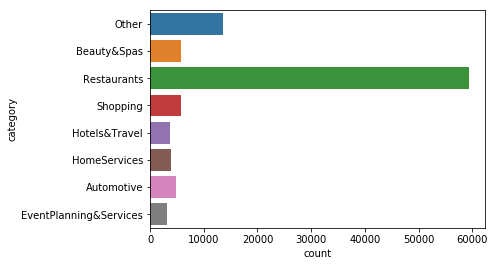

In [185]:
sns.countplot(y="category", data=train)

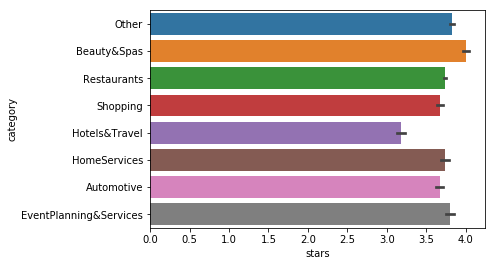

In [186]:
ax = sns.barplot(x="stars", y="category", data=train)

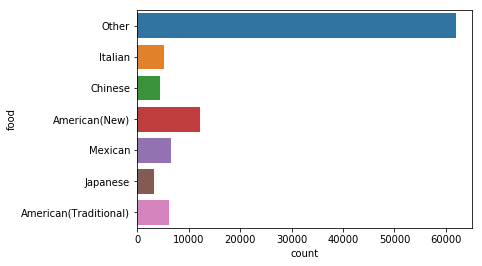

In [180]:
sns.countplot(y="food", data=train)

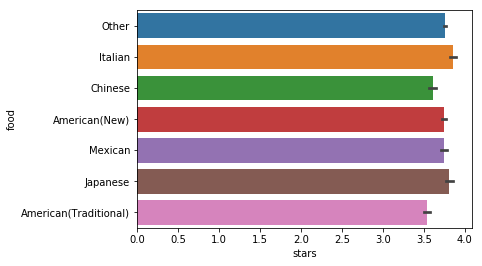

In [181]:
ax = sns.barplot(x="stars", y="food", data=train)

In [120]:
train['text_length'] = train['text'].apply(lambda x: len(x.split(" ")))  #get the counts of words in each review

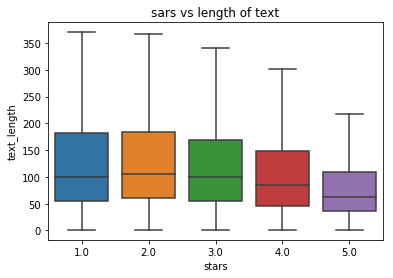

In [166]:
#no obvious relationship between stars & text_length
sns.boxplot(x='stars', y='text_length', data=train, showfliers=False)
plt.title('sars vs length of text')
plt.show()

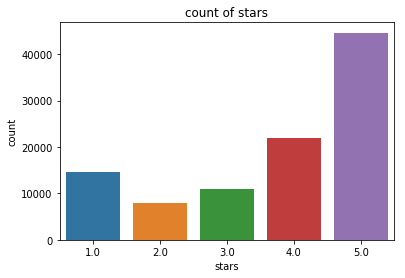

In [122]:
#5 stars is the most
ax = sns.countplot(x="stars", data=train)
plt.title('count of stars')
plt.show()

In [123]:
star_mean = []
for i in range(12,38):
    star_mean.append(train[train.iloc[:,i]=='1']['stars'].apply(pd.to_numeric).mean())

In [124]:
star_mean = pd.concat([name.reset_index(drop=True),pd.DataFrame(star_mean)], axis=1)
star_mean.columns = ['category', 'mean_stars']

In [125]:
star_mean = star_mean.groupby(['category']).median().sort_values("mean_stars",ascending=True)

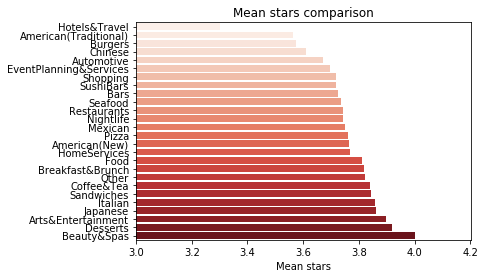

In [126]:
ax = sns.barplot(x="mean_stars", y=star_mean._stat_axis.values.tolist(), 
                 data=star_mean, palette="Reds")
axes = ax.axes
axes.set_xlim(3,)
plt.xlabel('Mean stars')
plt.title('Mean stars comparison')
plt.show()

In [127]:
Chinese = pd.DataFrame(data=Counter(list(train[train['category.Chinese']=='1']['state'])).most_common(),
                       columns=['state','counts'])
Chinese

,state,counts
0,NV,1662
1,AZ,1004
2,ON,920
3,NC,227
4,OH,177
5,WI,108
6,PA,105
7,AB,82
8,QC,66
9,IL,42


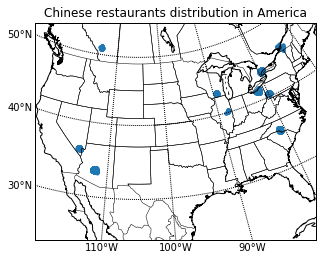

In [128]:
os.environ['PROJ_LIB'] = '/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

# lat_0 and lon_0 is the center of the map for U.S

map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# map = Basemap(projection='stere', 
#               lat_0=0, lon_0=280,
#               llcrnrlon=73.33, 
#               llcrnrlat=3.51, 
#               urcrnrlon=112.16, 
#               urcrnrlat=53.123)

map.drawmapboundary()   
#map.fillcontinents()   # fill the mainland, but may not show points
map.drawstates()        
map.drawcoastlines()    
map.drawcountries()  
#sys.setdefaultencoding('latin-1')
#map.drawcounties()   

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # draw latitude

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # draw lontitude


posi=train # read data

lat = np.array(posi['latitude'])                        
lon = np.array(posi['longitude'])                        
#pop = np.array(posi["pop"][0:180],dtype=float)    # get population data
marker='.'

#size=(pop/np.max(pop))*1000     # define the size based on the population
x,y = map(lon,lat)

map.scatter(x,y,marker=marker)     # could also use scatter of methord from Basemap
plt.title('Chinese restaurants distribution in America')
plt.show()

In [129]:
def get_open_time(df):
    """Performs cleaning on the dataset (expands columns, removes NAs, etc.).

    Args:
        df: Either the train or test DataFrame object.

    Returns:
        Cleaned DataFrame.
    """
    print('Expanding open time...')

    #get the open hour imformation
    import re
    df['Monday'] = train['hours'].apply(lambda x: re.findall(r".*Monday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Tuesday'] = train['hours'].apply(lambda x: re.findall(r".*Tuesday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Wednesday'] = train['hours'].apply(lambda x: re.findall(r".*Wednesday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Thursday'] = train['hours'].apply(lambda x: re.findall(r".*Thursday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Friday'] = train['hours'].apply(lambda x: re.findall(r".*Friday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Saturday'] = train['hours'].apply(lambda x: re.findall(r".*Saturday': '(.+?)'.*", x) if isinstance(x, str) else None)
    df['Sunday'] = train['hours'].apply(lambda x: re.findall(r".*Sunday': '(.+?)'.*", x) if isinstance(x, str) else None)
    
    return df

In [130]:
train = get_open_time(train)

In [131]:
train['hours'].apply(lambda x: 0 if isinstance(x, str) else 1).sum()   #amount of business that do not have information of open hours

8631

In [151]:
def count_open_days(row):
    count = 0
    for i in train.iloc[:,39:46].columns:
        if row[i] != []:
            count += 1
    return count

train['open_days'] = train.apply(count_open_days, axis=1) #takes a while

In [132]:
train['time'] = train['hours'].apply(lambda x: 1 if isinstance(x, str) else 0)

In [152]:
open_days_mean = []
for i in range(12,38):
    open_days_mean.append(train[(train['time']==1) & (train.iloc[:,i]=='1')]['open_days'].mean())

In [153]:
open_days_mean = pd.concat([name.reset_index(drop=True),pd.DataFrame(open_days_mean)], axis=1)
open_days_mean.columns = ['category', 'mean_open_days']
open_days_mean = open_days_mean.groupby(['category']).median().sort_values("mean_open_days",ascending=True)

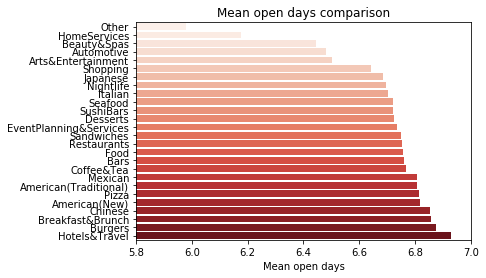

In [154]:
ax = sns.barplot(x="mean_open_days", y=open_days_mean._stat_axis.values.tolist(), 
                 data=open_days_mean, palette="Reds")
axes = ax.axes
axes.set_xlim(5.8,7)
plt.xlabel('Mean open days')
plt.title('Mean open days comparison')
plt.show()

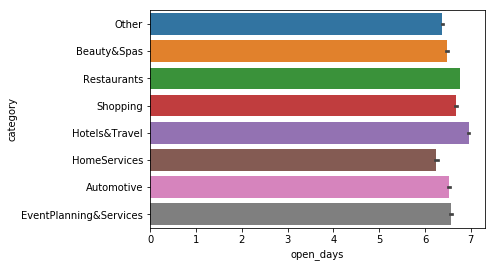

In [187]:
ax = sns.barplot(x="open_days", y="category", data=train)

In [134]:
def numeric(col):
    col = col.apply(lambda x: x if (x!=None) else 0)
    return col

In [135]:
def get_detail_time(df):
    """Performs cleaning on the dataset (expands columns, removes NAs, etc.).

    Args:
        df: Either the train or test DataFrame object.

    Returns:
        Cleaned DataFrame.
    """
    print('Getting open and close time on each day...')

    #get the open hour imformation
    import re
    df['Monday_open'] = df['Monday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Monday_close'] = df['Monday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    #df['Monday_open'] = df['Monday_open'].apply(lambda x: (x-24) if ((x>=23) & (x < 24)) else x)
    #df['Monday_close'] = df['Monday_close'].apply(lambda x: (24+x) if ((x>=0) & (x < 12)) else x)
    df['Monday_hours'] = df['Monday_close'] -train['Monday_open']
    df['Monday_hours'] = df['Monday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Tuesday_open'] = df['Tuesday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Tuesday_close'] = df['Tuesday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Tuesday_hours'] = df['Tuesday_close'] -train['Tuesday_open']
    df['Tuesday_hours'] = df['Tuesday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Wednesday_open'] = df['Wednesday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Wednesday_close'] = df['Wednesday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Wednesday_hours'] = df['Wednesday_close'] -train['Wednesday_open']
    df['Wednesday_hours'] = df['Wednesday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Thursday_open'] = df['Thursday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Thursday_close'] = df['Thursday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Thursday_hours'] = df['Thursday_close'] -train['Thursday_open']
    df['Thursday_hours'] = df['Thursday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Friday_open'] = df['Friday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Friday_close'] = df['Friday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Friday_hours'] = df['Friday_close'] -train['Friday_open']
    df['Friday_hours'] = df['Friday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Saturday_open'] = df['Saturday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Saturday_close'] = df['Saturday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Saturday_hours'] = df['Saturday_close'] -train['Saturday_open']
    df['Saturday_hours'] = df['Saturday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['Sunday_open'] = df['Sunday'].apply(lambda x: re.findall(r"'(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Sunday_close'] = df['Sunday'].apply(lambda x: re.findall(r".*-(.+?):.*", str(x)) if ((x!=[]) | (x!=None)) else None).apply(pd.to_numeric)
    df['Sunday_hours'] = df['Sunday_close'] -train['Sunday_open']
    df['Sunday_hours'] = df['Sunday_hours'].apply(lambda x: (24+x) if (x<=0) else x)
    
    df['open_hours'] = numeric(df['Monday_hours']) + numeric(df['Tuesday_hours']) + numeric(df['Wednesday_hours']) + numeric(df['Thursday_hours']) + numeric(df['Friday_hours']) + numeric(df['Saturday_hours']) + numeric(df['Sunday_hours'])
    
    return df

In [136]:
train = get_detail_time(train)

In [137]:
open_hours_mean = []
for i in range(12,38):
    open_hours_mean.append(train[(train['time']==1) & (train.iloc[:,i]=='1')]['open_hours'].mean())

In [140]:
open_hours_mean = pd.concat([name.reset_index(drop=True),pd.DataFrame(open_hours_mean)], axis=1)
open_hours_mean.columns = ['category', 'mean_open_hours']
open_hours_mean = open_hours_mean.groupby(['category']).median().sort_values("mean_open_hours",ascending=True)

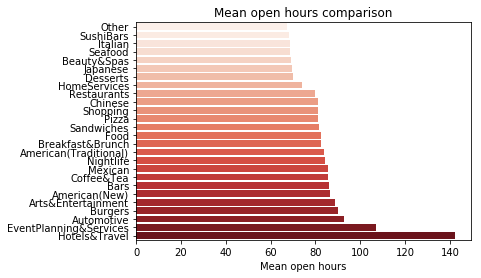

In [141]:
ax = sns.barplot(x="mean_open_hours", y=open_hours_mean._stat_axis.values.tolist(), 
                 data=open_hours_mean, palette="Reds")
axes = ax.axes
#axes.set_xlim(5.8,7)
plt.xlabel('Mean open hours')
plt.title('Mean open hours comparison')
plt.show()

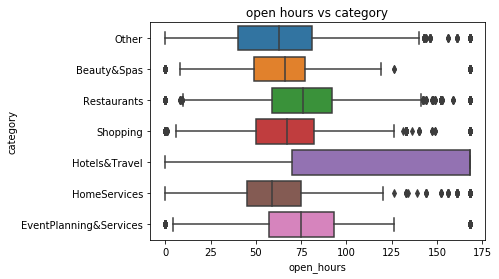

In [170]:
sns.boxplot(x='open_hours', y='category', data=train)
plt.title('open hours vs category')
plt.show()

KeyboardInterrupt: 

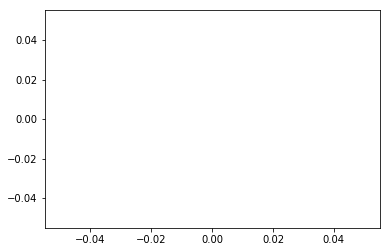

In [247]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

#ax = sns.barplot(x="open_hours", y="category", data=train, order=train['open_hours'])
fig, ax = plt.subplots()    
sortedgroupedbar(ax, x="stars",y="open_hours",groupby="category", data=train)
plt.show()


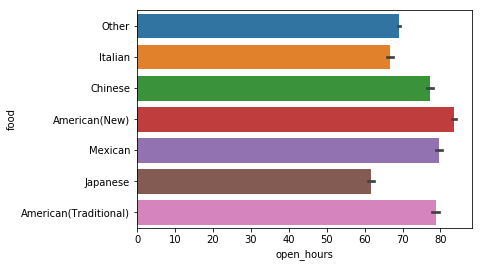

In [184]:
ax = sns.barplot(x="open_hours", y="food", data=train)

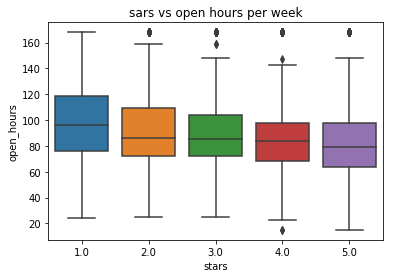

In [172]:
train['open_hours'] = train['open_hours'].astype(float)
sns.boxplot(x='stars', y='open_hours', data=train[(train['time']==1) & (train['category.Coffee&Tea']=='1')])
plt.title('sars vs open hours per week')
plt.show()

In [198]:
def get_wordnet_pos(treebank_tag):
    '''
    convert speach of a word in wordnet to a single alphabet
    '''
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return ''

In [225]:
def speech_count(s):
    s = unicode(s, "utf-8")
    tokens = nltk.word_tokenize(s.lower())
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(get_wordnet_pos(tag) for word,tag in tags)
    total = sum(counts.values())
    return dict((word, float(count)/total) for word,count in counts.items())

In [226]:
train['speech'] = train['text'].apply(lambda x: speech_count(x))

In [232]:
train['a'] = train['speech'].apply(lambda x: x['a'] if ('a' in x.keys()) else 0)
train['n'] = train['speech'].apply(lambda x: x['n'] if ('n' in x.keys()) else 0)
train['v'] = train['speech'].apply(lambda x: x['v'] if ('v' in x.keys()) else 0)
train['r'] = train['speech'].apply(lambda x: x['r'] if ('r' in x.keys()) else 0)

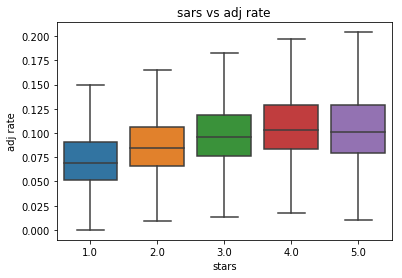

In [235]:
sns.boxplot(x='stars', y='a', data=train, showfliers=False)
plt.ylabel('adj rate')
plt.title('sars vs adj rate')
plt.show()

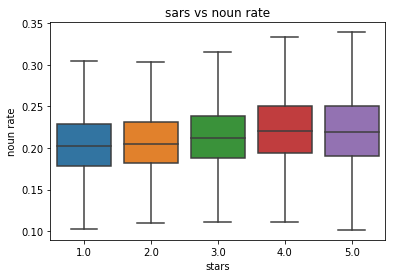

In [241]:
sns.boxplot(x='stars', y='n', data=train, showfliers=False)
plt.ylabel('noun rate')
plt.title('sars vs noun rate')
plt.show()

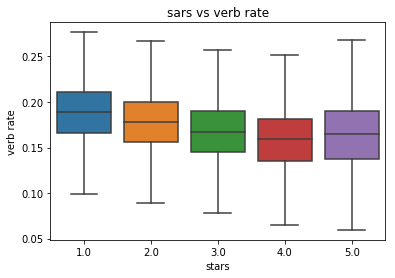

In [242]:
sns.boxplot(x='stars', y='v', data=train, showfliers=False)
plt.ylabel('verb rate')
plt.title('sars vs verb rate')
plt.show()

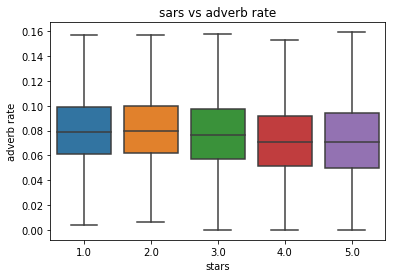

In [238]:
sns.boxplot(x='stars', y='r', data=train, showfliers=False)
plt.ylabel('adverb rate')
plt.title('sars vs adverb rate')
plt.show()